# Bestegg Data Science Task - Classification

This is the Bestegg DS code challenge project. The author spent several hours to build three classifiers. There is defintely more work could be done to further improve the model performance. But for the purpose of this task, the author would like to limit the time to 3~4hrs.

In [35]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read data
df = pd.read_csv("training_data.csv")
df.head()

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var189,var190,var191,var192,cat1,cat2,cat3,cat4,cat5,target
0,44686,86.52893,80.79771,75.25887,74.02016,69.01476,65.61648,63.23896,59.07834,56.80397,...,85.133333,84.45,85.20,85.900000,S,H,C,B,C,0
1,44687,68.56225,72.05599,69.52573,68.79211,65.48515,63.00976,61.19186,57.85757,55.94791,...,90.533333,86.55,87.24,87.300000,S,I,C,B,C,0
2,44688,77.88821,76.62270,73.11046,72.20956,68.26166,65.34046,63.19467,59.25676,57.01834,...,93.933333,90.20,89.84,88.600000,S,I,C,B,C,0
3,44689,81.11949,78.43038,74.59578,73.63714,69.45540,66.35951,64.07976,59.88543,57.50303,...,93.200000,88.15,88.48,87.766667,S,I,C,B,C,0
4,44690,62.18698,68.60618,67.86709,67.44987,65.15601,63.13671,61.52867,58.35072,56.42460,...,92.733333,88.15,88.00,88.566667,S,I,C,B,C,0


In [6]:
# take a quick look
df.shape

(14193, 199)

In [7]:
df.describe()

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var184,var185,var186,var187,var188,var189,var190,var191,var192,target
count,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,...,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000,14193.000000
mean,60691.679067,49.770732,49.816368,49.842512,49.847619,49.866617,49.877695,49.883878,49.889778,49.889927,...,0.001097,0.001118,0.001011,63.757204,64.040851,64.371634,64.739135,65.117889,65.514350,0.009441
std,9537.840350,19.287088,13.258854,11.027864,10.617691,9.063626,8.015570,7.248920,5.796510,4.958480,...,0.002623,0.003166,0.003446,53.854362,52.536290,51.892179,51.490296,51.202395,51.035665,0.096710
min,44686.000000,1.962090,6.802490,10.049460,10.790220,14.121840,16.951820,19.406260,25.208090,29.421340,...,-0.006320,-0.007100,-0.007710,1.200000,1.200000,1.666667,2.050000,2.160000,2.066667,0.000000
25%,52284.000000,35.131290,40.745080,42.377800,42.688460,43.737880,44.455170,44.995210,46.016590,46.572020,...,-0.000530,-0.001050,-0.001430,21.400000,22.200000,22.533333,22.950000,22.880000,23.400000,0.000000
50%,60726.000000,49.798510,49.924220,50.051180,50.093620,50.080180,50.101920,50.063300,49.967990,49.864340,...,0.000860,0.000940,0.000890,49.600000,50.400000,50.866667,51.050000,51.400000,51.266667,0.000000
75%,69174.000000,64.213330,59.015310,57.290670,57.032030,55.972370,55.194490,54.661910,53.790120,53.208110,...,0.002220,0.002460,0.002620,90.200000,91.300000,92.066667,92.900000,93.760000,94.433333,0.000000
max,76811.000000,99.049230,94.186610,92.934460,92.637450,91.165920,89.667530,88.134180,83.558250,79.443060,...,0.012600,0.012890,0.012780,358.200000,323.700000,317.200000,306.600000,295.480000,291.200000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14193 entries, 0 to 14192
Columns: 199 entries, ID to target
dtypes: float64(192), int64(2), object(5)
memory usage: 21.5+ MB


In [10]:
df.isna().sum()

ID        0
var1      0
var2      0
var3      0
var4      0
         ..
cat2      0
cat3      0
cat4      0
cat5      0
target    0
Length: 199, dtype: int64

In [13]:
# drop ID column as it's not relevant for model prediction
df.drop('ID', axis=1, inplace=True)
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var189,var190,var191,var192,cat1,cat2,cat3,cat4,cat5,target
0,86.52893,80.79771,75.25887,74.02016,69.01476,65.61648,63.23896,59.07834,56.80397,54.12610,...,85.133333,84.45,85.20,85.900000,S,H,C,B,C,0
1,68.56225,72.05599,69.52573,68.79211,65.48515,63.00976,61.19186,57.85757,55.94791,53.60131,...,90.533333,86.55,87.24,87.300000,S,I,C,B,C,0
2,77.88821,76.62270,73.11046,72.20956,68.26166,65.34046,63.19467,59.25676,57.01834,54.32896,...,93.933333,90.20,89.84,88.600000,S,I,C,B,C,0
3,81.11949,78.43038,74.59578,73.63714,69.45540,66.35951,64.07976,59.88543,57.50303,54.66082,...,93.200000,88.15,88.48,87.766667,S,I,C,B,C,0
4,62.18698,68.60618,67.86709,67.44987,65.15601,63.13671,61.52867,58.35072,56.42460,53.99952,...,92.733333,88.15,88.00,88.566667,S,I,C,B,C,0


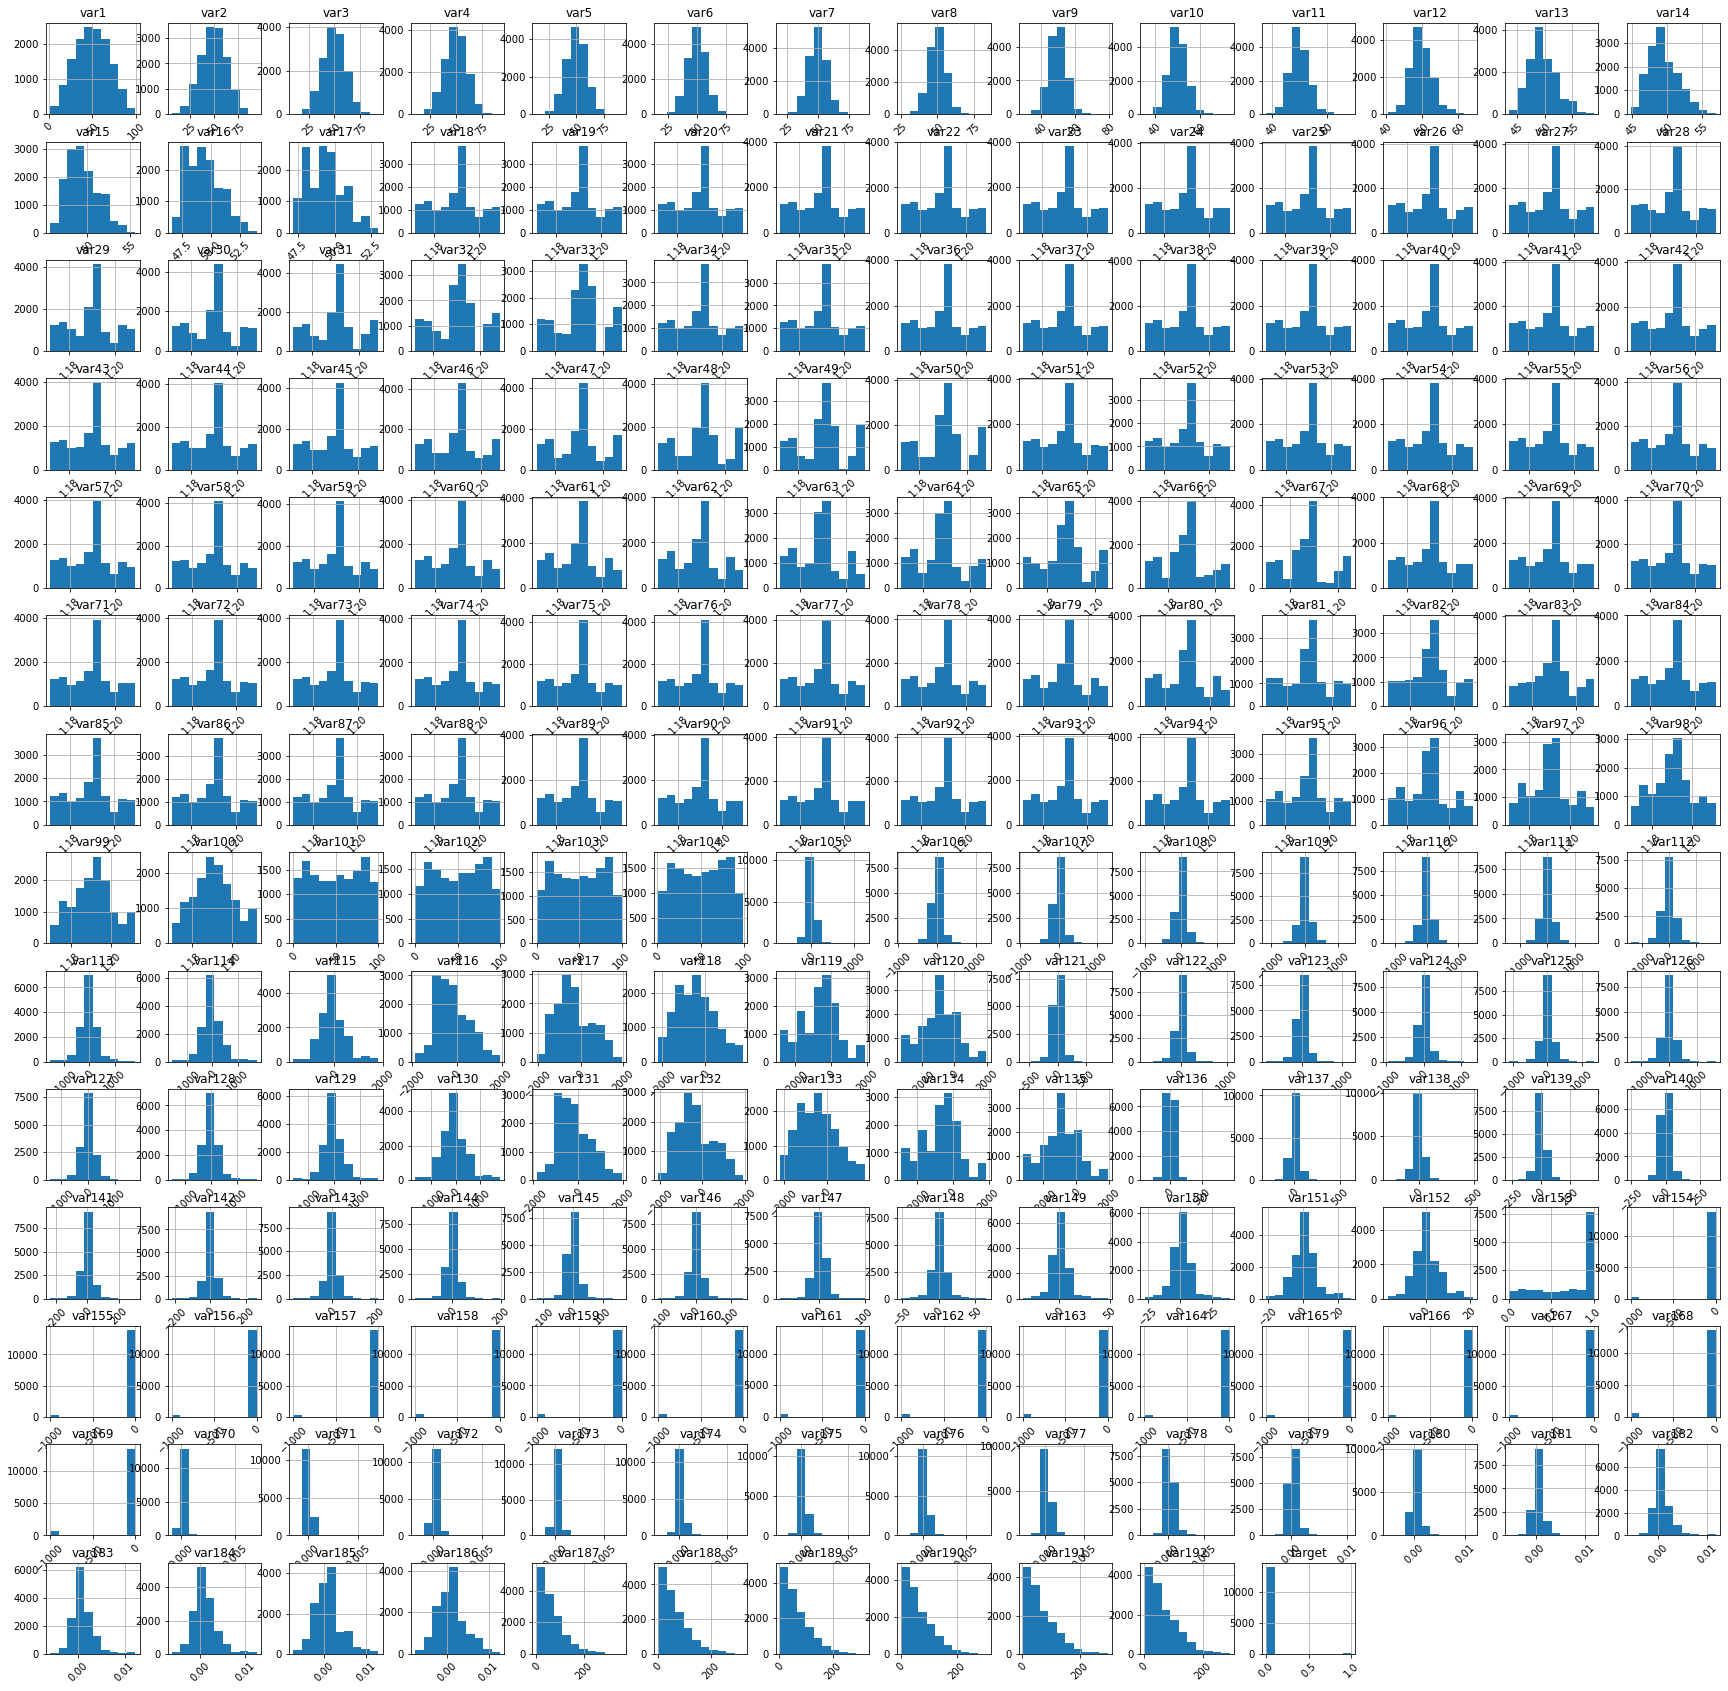

In [17]:
# quick EDA on the numeric features to gain some understanding on outliers, distribution etc. 

df.hist(figsize=(30,30), xrot=45)
plt.show()

<AxesSubplot:>

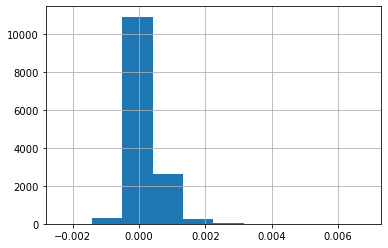

In [27]:
# take a closer look on several columns
df['var175'].hist()

In [18]:
# check statistics of the categorical features
df.describe(include='object')

,cat1,cat2,cat3,cat4,cat5
count,14193,14193,14193,14193,14193
unique,20,9,3,3,3
top,M,E,B,B,B
freq,716,1577,7091,12814,11367


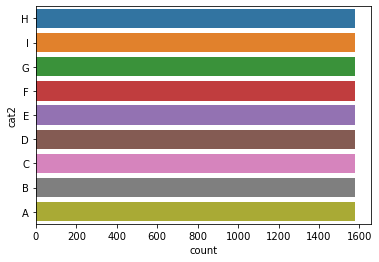

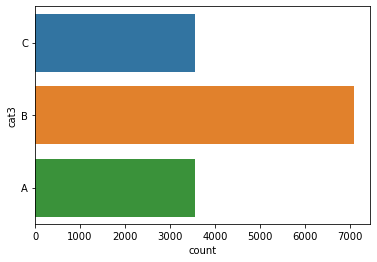

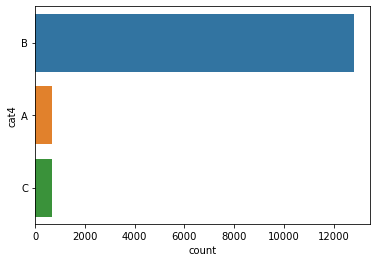

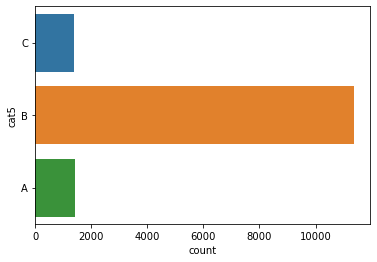

In [20]:
# Plot each categorical feature
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 20:
        sns.countplot(y=column, data=df)
        plt.show()

In [21]:
# Check correlations between the numeric features
corrs = df.corr()
corrs

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var184,var185,var186,var187,var188,var189,var190,var191,var192,target
var1,1.000000,0.931959,0.861116,0.844624,0.771118,0.710948,0.661156,0.552003,0.477528,0.378151,...,0.099025,0.079589,0.071590,0.016159,0.017416,0.017072,0.016999,0.015430,0.013787,0.143168
var2,0.931959,1.000000,0.983771,0.976580,0.933969,0.888934,0.846140,0.737876,0.654535,0.534209,...,0.157276,0.130446,0.117518,0.021619,0.022948,0.023325,0.023694,0.022838,0.021253,0.149869
var3,0.861116,0.983771,1.000000,0.999309,0.981759,0.952839,0.920511,0.826267,0.745662,0.621237,...,0.194813,0.163292,0.147322,0.024338,0.025586,0.026128,0.026592,0.026054,0.024774,0.149610
var4,0.844624,0.976580,0.999309,1.000000,0.988064,0.963050,0.933448,0.843411,0.764189,0.639758,...,0.203499,0.170904,0.154245,0.024748,0.025970,0.026534,0.027002,0.026517,0.025308,0.149116
var5,0.771118,0.933969,0.981759,0.988064,1.000000,0.992747,0.976275,0.908658,0.838686,0.718194,...,0.243981,0.206502,0.186716,0.025511,0.026579,0.027179,0.027601,0.027273,0.026357,0.145244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var189,0.017072,0.023325,0.026128,0.026534,0.027179,0.026183,0.024156,0.014475,0.001849,-0.025025,...,-0.106096,-0.148233,-0.136314,0.954096,0.988134,1.000000,0.992960,0.983713,0.974857,-0.004664
var190,0.016999,0.023694,0.026592,0.027002,0.027601,0.026496,0.024341,0.014332,0.001487,-0.025690,...,-0.106513,-0.149644,-0.137785,0.939897,0.975268,0.992960,1.000000,0.995220,0.988216,-0.006096
var191,0.015430,0.022838,0.026054,0.026517,0.027273,0.026211,0.024043,0.013916,0.000969,-0.026348,...,-0.107632,-0.151576,-0.139800,0.928373,0.964033,0.983713,0.995220,1.000000,0.996506,-0.006770
var192,0.013787,0.021253,0.024774,0.025308,0.026357,0.025487,0.023438,0.013464,0.000565,-0.026740,...,-0.107891,-0.152675,-0.140996,0.919671,0.954442,0.974857,0.988216,0.996506,1.000000,-0.007090


This dataset has many columns/features so to avoid curse of dimensionality, PCA might be needed.
But before we do PCA we would like to do one hot encoding to convert catergorical columns.
Also want to normalize the data so all features are at the same scale.
This is also an imbalance dataset so some data pre-processing is needed. We will use SMOTE/ENN method.

In [23]:
# One hot encoding on categorical data 
df1 = pd.get_dummies(df)
df1.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,cat2_I,cat3_A,cat3_B,cat3_C,cat4_A,cat4_B,cat4_C,cat5_A,cat5_B,cat5_C
0,86.52893,80.79771,75.25887,74.02016,69.01476,65.61648,63.23896,59.07834,56.80397,54.12610,...,0,0,0,1,0,1,0,0,0,1
1,68.56225,72.05599,69.52573,68.79211,65.48515,63.00976,61.19186,57.85757,55.94791,53.60131,...,1,0,0,1,0,1,0,0,0,1
2,77.88821,76.62270,73.11046,72.20956,68.26166,65.34046,63.19467,59.25676,57.01834,54.32896,...,1,0,0,1,0,1,0,0,0,1
3,81.11949,78.43038,74.59578,73.63714,69.45540,66.35951,64.07976,59.88543,57.50303,54.66082,...,1,0,0,1,0,1,0,0,0,1
4,62.18698,68.60618,67.86709,67.44987,65.15601,63.13671,61.52867,58.35072,56.42460,53.99952,...,1,0,0,1,0,1,0,0,0,1


<AxesSubplot:>

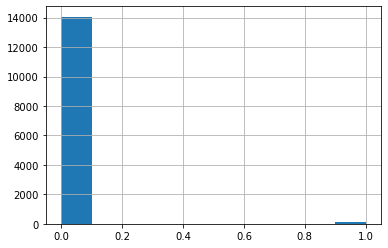

In [92]:
df1['target'].hist()

In [41]:
# This is an imbalanced data so we need to handle it using SMOTE/ENN

# assign features (X) and target (y)
X = df1.drop(["target"], axis=1).values
y = df1['target'].values

# apply SMOTE and ENN
smt = SMOTEENN(random_state=42)
X1, y1 = smt.fit_resample(X, y)

# check if the dataset is balanced now
counter1 = Counter(y)
counter2 = Counter(y1)
print(f"before SMOTE and ENN, the data is {counter1}")
print(f"after SMOTE and ENN, the data is {counter2}")
print("the dataset is now balanced.")


before SMOTE and ENN, the data is Counter({0: 14059, 1: 134})
after SMOTE and ENN, the data is Counter({1: 14000, 0: 13663})
the dataset is now balanced.


In [128]:
# splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.30,random_state=42)

In [129]:
# normalizing the features

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [130]:
# PCA - n_components =20 will explain ~90% of variants hence chosen

from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.37972546 0.17055782 0.09146085 0.0446343  0.0393847  0.02462958
 0.02215361 0.01499919 0.01322065 0.01170219 0.01037743 0.00913474
 0.00848375 0.00708718 0.00662386 0.00604363 0.00564779 0.00549389
 0.00537183 0.00511046]


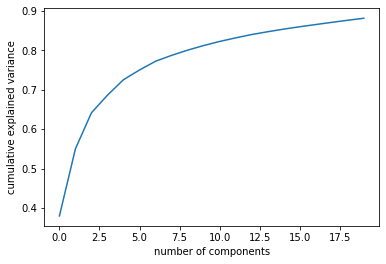

In [131]:
# plot cumulative explained variance ratio as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [132]:
# Train classifier

from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

lr = LogisticRegression()
lr.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

cat = CatBoostClassifier(iterations=2, learning_rate=1, depth=2)
cat.fit(X_train, y_train)

# predictions
y_pred_lr = lr.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_cat = cat.predict(X_test)

[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4766777	total: 8.01ms	remaining: 8.01ms
1:	learn: 0.4365355	total: 14.3ms	remaining: 0us


In [133]:
# Model Performance

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

lr_score = accuracy_score(y_test, y_pred_lr)
xgb_score = accuracy_score(y_test, y_pred_xgb)
cat_score = accuracy_score(y_test, y_pred_cat)

print("Accuracy score (lr): ", lr_score)
print("Accuracy score (xgb): ", xgb_score)
print("Accuracy score (cat): ", cat_score)
print()

lr_auc_score = roc_auc_score(y_test, y_pred_lr)
xgb_auc_score = roc_auc_score(y_test, y_pred_xgb)
cat_auc_score = roc_auc_score(y_test, y_pred_cat)

print("ROC AUC score (lr): ", lr_auc_score)
print("ROC AUC score (xgb): ", xgb_auc_score)
print("ROC AUC score (cat): ", cat_auc_score)


Accuracy score (lr):  0.9033618508254007
Accuracy score (xgb):  0.9916857452705146
Accuracy score (cat):  0.7919026388721533

ROC AUC score (lr):  0.9030061143514053
ROC AUC score (xgb):  0.9916021763717503
ROC AUC score (cat):  0.791227873608083


[22:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.4766777	total: 4.59ms	remaining: 4.59ms
1:	learn: 0.4365355	total: 8.53ms	remaining: 0us


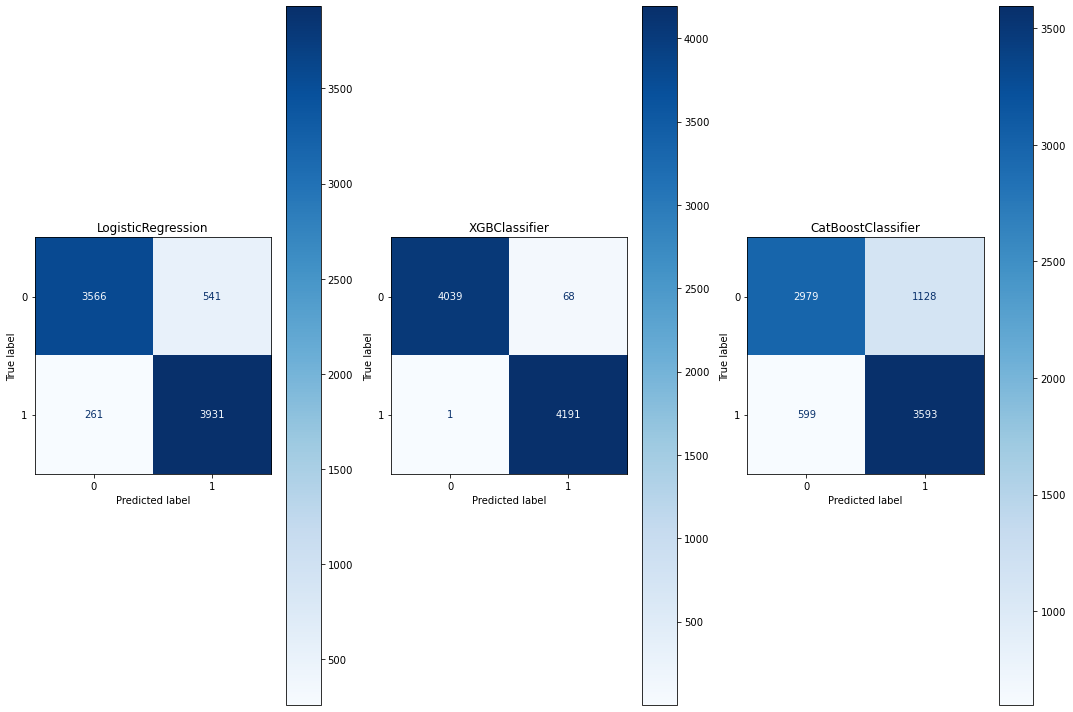

In [134]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

classifiers = [LogisticRegression(), 
               XGBClassifier(),
               CatBoostClassifier(iterations=2, learning_rate=1, depth=2)]

for cls in classifiers:
    cls.fit(X_train, y_train)
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [135]:
# check the Precision, Recall and F1 score to better evaluate the performances of the models

from sklearn.metrics import classification_report

print('\033[1m  Log Regression  \033[0m')
print(classification_report(y_test, y_pred_lr))  # lr classification report
print("\n")

print('\033[1m  XGB  \033[0m')
print(classification_report(y_test, y_pred_xgb))  # xgb classification report
print("\n")

print('\033[1m  CAT  \033[0m')
print(classification_report(y_test, y_pred_cat))  # cat classification report
print("\n")

  Log Regression  
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4107
           1       0.88      0.94      0.91      4192

    accuracy                           0.90      8299
   macro avg       0.91      0.90      0.90      8299
weighted avg       0.91      0.90      0.90      8299



  XGB  
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4107
           1       0.98      1.00      0.99      4192

    accuracy                           0.99      8299
   macro avg       0.99      0.99      0.99      8299
weighted avg       0.99      0.99      0.99      8299



  CAT  
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      4107
           1       0.76      0.86      0.81      4192

    accuracy                           0.79      8299
   macro avg       0.80      0.79      0.79      8299
weighted avg       0.80      0.79  

In [91]:
# XGB is best among all three models but let's see if we could improve the performnace of CAT by 
# tuning the hyperparameters
# And yes, we are able to improve the CAT model performance to 0.94 and the best {'max_depth': 5, 'n_estimators': 300}!

from sklearn.model_selection import GridSearchCV

# create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate CatBoostClassifier
cat1 = CatBoostClassifier()

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cat1, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train,y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)




Learning rate set to 0.274219
0:	learn: 0.6031645	total: 2.29ms	remaining: 227ms
1:	learn: 0.5433264	total: 4.08ms	remaining: 200ms
2:	learn: 0.5031997	total: 5.93ms	remaining: 192ms
3:	learn: 0.4706824	total: 7.73ms	remaining: 185ms
4:	learn: 0.4465618	total: 10.3ms	remaining: 196ms
5:	learn: 0.4305967	total: 13ms	remaining: 203ms
6:	learn: 0.4183176	total: 15.6ms	remaining: 207ms
7:	learn: 0.4078804	total: 17.6ms	remaining: 202ms
8:	learn: 0.3979405	total: 19.4ms	remaining: 196ms
9:	learn: 0.3875635	total: 21.8ms	remaining: 197ms
10:	learn: 0.3800913	total: 24ms	remaining: 194ms
11:	learn: 0.3742121	total: 28ms	remaining: 205ms
12:	learn: 0.3697311	total: 30.3ms	remaining: 203ms
13:	learn: 0.3649129	total: 32.6ms	remaining: 201ms
14:	learn: 0.3605142	total: 34.5ms	remaining: 196ms
15:	learn: 0.3543724	total: 36.4ms	remaining: 191ms
16:	learn: 0.3510401	total: 38.3ms	remaining: 187ms
17:	learn: 0.3483028	total: 41.5ms	remaining: 189ms
18:	learn: 0.3450928	total: 43.4ms	remaining: 185m

Learning rate set to 0.274219
0:	learn: 0.6022598	total: 1.84ms	remaining: 182ms
1:	learn: 0.5414058	total: 3.67ms	remaining: 180ms
2:	learn: 0.5019201	total: 8.08ms	remaining: 261ms
3:	learn: 0.4697960	total: 10.1ms	remaining: 244ms
4:	learn: 0.4490128	total: 12ms	remaining: 227ms
5:	learn: 0.4310613	total: 13.8ms	remaining: 217ms
6:	learn: 0.4174693	total: 15.7ms	remaining: 209ms
7:	learn: 0.4062271	total: 17.6ms	remaining: 202ms
8:	learn: 0.3957805	total: 23ms	remaining: 233ms
9:	learn: 0.3859796	total: 25.3ms	remaining: 228ms
10:	learn: 0.3789260	total: 27.2ms	remaining: 220ms
11:	learn: 0.3700918	total: 29.1ms	remaining: 214ms
12:	learn: 0.3644401	total: 30.9ms	remaining: 207ms
13:	learn: 0.3599364	total: 33.4ms	remaining: 205ms
14:	learn: 0.3554780	total: 37.4ms	remaining: 212ms
15:	learn: 0.3519945	total: 39.4ms	remaining: 207ms
16:	learn: 0.3494422	total: 41.3ms	remaining: 201ms
17:	learn: 0.3459792	total: 43.2ms	remaining: 197ms
18:	learn: 0.3433821	total: 45.1ms	remaining: 19

63:	learn: 0.2732303	total: 152ms	remaining: 85.7ms
64:	learn: 0.2724405	total: 159ms	remaining: 85.9ms
65:	learn: 0.2716607	total: 162ms	remaining: 83.6ms
66:	learn: 0.2704083	total: 165ms	remaining: 81.3ms
67:	learn: 0.2695534	total: 167ms	remaining: 78.6ms
68:	learn: 0.2684578	total: 169ms	remaining: 75.9ms
69:	learn: 0.2673915	total: 174ms	remaining: 74.5ms
70:	learn: 0.2663613	total: 176ms	remaining: 71.9ms
71:	learn: 0.2646593	total: 178ms	remaining: 69.2ms
72:	learn: 0.2642115	total: 180ms	remaining: 66.5ms
73:	learn: 0.2639299	total: 184ms	remaining: 64.6ms
74:	learn: 0.2635771	total: 188ms	remaining: 62.6ms
75:	learn: 0.2632440	total: 190ms	remaining: 60ms
76:	learn: 0.2623796	total: 192ms	remaining: 57.3ms
77:	learn: 0.2615658	total: 194ms	remaining: 54.6ms
78:	learn: 0.2608456	total: 200ms	remaining: 53.3ms
79:	learn: 0.2603276	total: 203ms	remaining: 50.8ms
80:	learn: 0.2600883	total: 205ms	remaining: 48.2ms
81:	learn: 0.2590678	total: 207ms	remaining: 45.5ms
82:	learn: 0.2

44:	learn: 0.3161386	total: 186ms	remaining: 642ms
45:	learn: 0.3151934	total: 190ms	remaining: 636ms
46:	learn: 0.3131939	total: 194ms	remaining: 632ms
47:	learn: 0.3122781	total: 198ms	remaining: 626ms
48:	learn: 0.3113282	total: 203ms	remaining: 626ms
49:	learn: 0.3097416	total: 208ms	remaining: 623ms
50:	learn: 0.3086256	total: 212ms	remaining: 618ms
51:	learn: 0.3076154	total: 218ms	remaining: 619ms
52:	learn: 0.3067617	total: 222ms	remaining: 615ms
53:	learn: 0.3056002	total: 226ms	remaining: 612ms
54:	learn: 0.3044286	total: 232ms	remaining: 611ms
55:	learn: 0.3036125	total: 236ms	remaining: 606ms
56:	learn: 0.3022091	total: 240ms	remaining: 602ms
57:	learn: 0.3013145	total: 244ms	remaining: 597ms
58:	learn: 0.3002116	total: 250ms	remaining: 596ms
59:	learn: 0.2997675	total: 254ms	remaining: 592ms
60:	learn: 0.2991742	total: 257ms	remaining: 586ms
61:	learn: 0.2982420	total: 262ms	remaining: 583ms
62:	learn: 0.2976387	total: 266ms	remaining: 579ms
63:	learn: 0.2965139	total: 270

38:	learn: 0.3262625	total: 170ms	remaining: 704ms
39:	learn: 0.3252263	total: 176ms	remaining: 702ms
40:	learn: 0.3241232	total: 181ms	remaining: 702ms
41:	learn: 0.3234245	total: 188ms	remaining: 706ms
42:	learn: 0.3229203	total: 191ms	remaining: 696ms
43:	learn: 0.3219804	total: 194ms	remaining: 689ms
44:	learn: 0.3209976	total: 198ms	remaining: 682ms
45:	learn: 0.3199531	total: 202ms	remaining: 676ms
46:	learn: 0.3184314	total: 206ms	remaining: 670ms
47:	learn: 0.3168997	total: 209ms	remaining: 662ms
48:	learn: 0.3153736	total: 213ms	remaining: 656ms
49:	learn: 0.3146629	total: 217ms	remaining: 651ms
50:	learn: 0.3137861	total: 221ms	remaining: 647ms
51:	learn: 0.3126805	total: 225ms	remaining: 640ms
52:	learn: 0.3120205	total: 230ms	remaining: 637ms
53:	learn: 0.3109335	total: 234ms	remaining: 632ms
54:	learn: 0.3100308	total: 238ms	remaining: 626ms
55:	learn: 0.3089286	total: 242ms	remaining: 621ms
56:	learn: 0.3077527	total: 246ms	remaining: 617ms
57:	learn: 0.3070398	total: 250

5:	learn: 0.4371523	total: 25.6ms	remaining: 829ms
6:	learn: 0.4241998	total: 29.7ms	remaining: 819ms
7:	learn: 0.4124966	total: 35ms	remaining: 840ms
8:	learn: 0.4037679	total: 39.8ms	remaining: 844ms
9:	learn: 0.3963071	total: 44.4ms	remaining: 844ms
10:	learn: 0.3911552	total: 47.7ms	remaining: 819ms
11:	learn: 0.3835215	total: 52.6ms	remaining: 825ms
12:	learn: 0.3802551	total: 56.2ms	remaining: 808ms
13:	learn: 0.3758348	total: 60.1ms	remaining: 799ms
14:	learn: 0.3716659	total: 64ms	remaining: 789ms
15:	learn: 0.3660760	total: 68.7ms	remaining: 790ms
16:	learn: 0.3607907	total: 72.6ms	remaining: 781ms
17:	learn: 0.3582219	total: 76.4ms	remaining: 773ms
18:	learn: 0.3554718	total: 79.8ms	remaining: 761ms
19:	learn: 0.3532073	total: 84.4ms	remaining: 760ms
20:	learn: 0.3500581	total: 88.4ms	remaining: 753ms
21:	learn: 0.3455509	total: 92.3ms	remaining: 747ms
22:	learn: 0.3417497	total: 97.8ms	remaining: 753ms
23:	learn: 0.3402395	total: 102ms	remaining: 746ms
24:	learn: 0.3366602	t

184:	learn: 0.2241690	total: 890ms	remaining: 72.2ms
185:	learn: 0.2237080	total: 895ms	remaining: 67.4ms
186:	learn: 0.2233163	total: 900ms	remaining: 62.6ms
187:	learn: 0.2231145	total: 905ms	remaining: 57.7ms
188:	learn: 0.2229379	total: 911ms	remaining: 53ms
189:	learn: 0.2227125	total: 914ms	remaining: 48.1ms
190:	learn: 0.2223256	total: 918ms	remaining: 43.3ms
191:	learn: 0.2221184	total: 922ms	remaining: 38.4ms
192:	learn: 0.2218328	total: 927ms	remaining: 33.6ms
193:	learn: 0.2214421	total: 930ms	remaining: 28.8ms
194:	learn: 0.2212197	total: 934ms	remaining: 24ms
195:	learn: 0.2209303	total: 938ms	remaining: 19.1ms
196:	learn: 0.2206518	total: 944ms	remaining: 14.4ms
197:	learn: 0.2203759	total: 948ms	remaining: 9.58ms
198:	learn: 0.2199591	total: 952ms	remaining: 4.78ms
199:	learn: 0.2197772	total: 957ms	remaining: 0us
Learning rate set to 0.145229
0:	learn: 0.6060411	total: 3.62ms	remaining: 720ms
1:	learn: 0.5362451	total: 7.28ms	remaining: 721ms
2:	learn: 0.5069327	total: 

157:	learn: 0.2367311	total: 743ms	remaining: 198ms
158:	learn: 0.2356944	total: 749ms	remaining: 193ms
159:	learn: 0.2353807	total: 755ms	remaining: 189ms
160:	learn: 0.2349007	total: 759ms	remaining: 184ms
161:	learn: 0.2344511	total: 763ms	remaining: 179ms
162:	learn: 0.2342004	total: 768ms	remaining: 174ms
163:	learn: 0.2337315	total: 772ms	remaining: 169ms
164:	learn: 0.2333338	total: 777ms	remaining: 165ms
165:	learn: 0.2329173	total: 781ms	remaining: 160ms
166:	learn: 0.2325833	total: 785ms	remaining: 155ms
167:	learn: 0.2323342	total: 789ms	remaining: 150ms
168:	learn: 0.2319781	total: 795ms	remaining: 146ms
169:	learn: 0.2314797	total: 799ms	remaining: 141ms
170:	learn: 0.2312414	total: 803ms	remaining: 136ms
171:	learn: 0.2308794	total: 808ms	remaining: 132ms
172:	learn: 0.2303845	total: 812ms	remaining: 127ms
173:	learn: 0.2301169	total: 816ms	remaining: 122ms
174:	learn: 0.2295888	total: 820ms	remaining: 117ms
175:	learn: 0.2290735	total: 825ms	remaining: 113ms
176:	learn: 

131:	learn: 0.2447313	total: 607ms	remaining: 313ms
132:	learn: 0.2444905	total: 611ms	remaining: 308ms
133:	learn: 0.2441093	total: 616ms	remaining: 304ms
134:	learn: 0.2431572	total: 621ms	remaining: 299ms
135:	learn: 0.2428921	total: 625ms	remaining: 294ms
136:	learn: 0.2425371	total: 630ms	remaining: 290ms
137:	learn: 0.2421565	total: 634ms	remaining: 285ms
138:	learn: 0.2419045	total: 639ms	remaining: 281ms
139:	learn: 0.2414285	total: 643ms	remaining: 275ms
140:	learn: 0.2408875	total: 646ms	remaining: 270ms
141:	learn: 0.2403327	total: 652ms	remaining: 266ms
142:	learn: 0.2399142	total: 656ms	remaining: 262ms
143:	learn: 0.2395616	total: 661ms	remaining: 257ms
144:	learn: 0.2393146	total: 668ms	remaining: 253ms
145:	learn: 0.2389492	total: 672ms	remaining: 249ms
146:	learn: 0.2386788	total: 677ms	remaining: 244ms
147:	learn: 0.2384236	total: 683ms	remaining: 240ms
148:	learn: 0.2378885	total: 686ms	remaining: 235ms
149:	learn: 0.2375324	total: 691ms	remaining: 230ms
150:	learn: 

104:	learn: 0.2887753	total: 533ms	remaining: 989ms
105:	learn: 0.2882148	total: 541ms	remaining: 990ms
106:	learn: 0.2878121	total: 547ms	remaining: 987ms
107:	learn: 0.2870332	total: 555ms	remaining: 987ms
108:	learn: 0.2863512	total: 560ms	remaining: 981ms
109:	learn: 0.2859565	total: 564ms	remaining: 974ms
110:	learn: 0.2855694	total: 575ms	remaining: 979ms
111:	learn: 0.2852433	total: 579ms	remaining: 972ms
112:	learn: 0.2849011	total: 589ms	remaining: 975ms
113:	learn: 0.2844534	total: 592ms	remaining: 966ms
114:	learn: 0.2839497	total: 596ms	remaining: 958ms
115:	learn: 0.2833325	total: 605ms	remaining: 960ms
116:	learn: 0.2827955	total: 609ms	remaining: 953ms
117:	learn: 0.2823206	total: 617ms	remaining: 952ms
118:	learn: 0.2818846	total: 623ms	remaining: 947ms
119:	learn: 0.2813026	total: 627ms	remaining: 941ms
120:	learn: 0.2809543	total: 637ms	remaining: 943ms
121:	learn: 0.2803412	total: 641ms	remaining: 936ms
122:	learn: 0.2800862	total: 648ms	remaining: 933ms
123:	learn: 

271:	learn: 0.2298299	total: 1.79s	remaining: 184ms
272:	learn: 0.2296252	total: 1.79s	remaining: 178ms
273:	learn: 0.2294383	total: 1.81s	remaining: 171ms
274:	learn: 0.2292071	total: 1.82s	remaining: 165ms
275:	learn: 0.2289904	total: 1.83s	remaining: 159ms
276:	learn: 0.2284885	total: 1.84s	remaining: 152ms
277:	learn: 0.2282314	total: 1.84s	remaining: 146ms
278:	learn: 0.2280939	total: 1.85s	remaining: 139ms
279:	learn: 0.2277898	total: 1.86s	remaining: 133ms
280:	learn: 0.2273819	total: 1.86s	remaining: 126ms
281:	learn: 0.2272806	total: 1.87s	remaining: 119ms
282:	learn: 0.2270525	total: 1.88s	remaining: 113ms
283:	learn: 0.2268059	total: 1.89s	remaining: 106ms
284:	learn: 0.2266223	total: 1.89s	remaining: 99.7ms
285:	learn: 0.2264239	total: 1.9s	remaining: 93ms
286:	learn: 0.2261412	total: 1.91s	remaining: 86.3ms
287:	learn: 0.2258877	total: 1.91s	remaining: 79.7ms
288:	learn: 0.2257672	total: 1.92s	remaining: 73ms
289:	learn: 0.2255780	total: 1.93s	remaining: 66.5ms
290:	learn:

162:	learn: 0.2605720	total: 735ms	remaining: 618ms
163:	learn: 0.2601957	total: 739ms	remaining: 613ms
164:	learn: 0.2598353	total: 747ms	remaining: 611ms
165:	learn: 0.2595084	total: 751ms	remaining: 606ms
166:	learn: 0.2592465	total: 755ms	remaining: 601ms
167:	learn: 0.2590029	total: 760ms	remaining: 597ms
168:	learn: 0.2588435	total: 765ms	remaining: 593ms
169:	learn: 0.2584807	total: 769ms	remaining: 588ms
170:	learn: 0.2578948	total: 772ms	remaining: 583ms
171:	learn: 0.2573335	total: 777ms	remaining: 578ms
172:	learn: 0.2571122	total: 781ms	remaining: 573ms
173:	learn: 0.2565592	total: 786ms	remaining: 569ms
174:	learn: 0.2562256	total: 791ms	remaining: 565ms
175:	learn: 0.2557865	total: 795ms	remaining: 560ms
176:	learn: 0.2552890	total: 799ms	remaining: 555ms
177:	learn: 0.2550580	total: 803ms	remaining: 550ms
178:	learn: 0.2547332	total: 808ms	remaining: 546ms
179:	learn: 0.2543950	total: 812ms	remaining: 541ms
180:	learn: 0.2537353	total: 816ms	remaining: 536ms
181:	learn: 

43:	learn: 0.3308795	total: 192ms	remaining: 1.11s
44:	learn: 0.3298592	total: 197ms	remaining: 1.12s
45:	learn: 0.3287997	total: 202ms	remaining: 1.11s
46:	learn: 0.3275085	total: 206ms	remaining: 1.11s
47:	learn: 0.3263602	total: 210ms	remaining: 1.1s
48:	learn: 0.3251992	total: 215ms	remaining: 1.1s
49:	learn: 0.3236171	total: 219ms	remaining: 1.09s
50:	learn: 0.3226489	total: 223ms	remaining: 1.09s
51:	learn: 0.3219322	total: 228ms	remaining: 1.09s
52:	learn: 0.3211795	total: 232ms	remaining: 1.08s
53:	learn: 0.3204737	total: 236ms	remaining: 1.07s
54:	learn: 0.3194962	total: 240ms	remaining: 1.07s
55:	learn: 0.3185145	total: 244ms	remaining: 1.06s
56:	learn: 0.3175695	total: 248ms	remaining: 1.06s
57:	learn: 0.3165406	total: 253ms	remaining: 1.05s
58:	learn: 0.3151974	total: 258ms	remaining: 1.05s
59:	learn: 0.3145824	total: 262ms	remaining: 1.05s
60:	learn: 0.3127648	total: 266ms	remaining: 1.04s
61:	learn: 0.3122115	total: 270ms	remaining: 1.04s
62:	learn: 0.3112123	total: 276ms

239:	learn: 0.2316892	total: 1.05s	remaining: 263ms
240:	learn: 0.2312910	total: 1.06s	remaining: 259ms
241:	learn: 0.2310967	total: 1.06s	remaining: 255ms
242:	learn: 0.2309697	total: 1.07s	remaining: 251ms
243:	learn: 0.2307365	total: 1.07s	remaining: 246ms
244:	learn: 0.2304802	total: 1.08s	remaining: 242ms
245:	learn: 0.2301502	total: 1.08s	remaining: 238ms
246:	learn: 0.2300503	total: 1.09s	remaining: 233ms
247:	learn: 0.2298108	total: 1.09s	remaining: 229ms
248:	learn: 0.2296835	total: 1.1s	remaining: 225ms
249:	learn: 0.2295263	total: 1.1s	remaining: 220ms
250:	learn: 0.2293076	total: 1.1s	remaining: 216ms
251:	learn: 0.2291607	total: 1.11s	remaining: 211ms
252:	learn: 0.2289673	total: 1.11s	remaining: 207ms
253:	learn: 0.2286662	total: 1.12s	remaining: 202ms
254:	learn: 0.2284900	total: 1.12s	remaining: 198ms
255:	learn: 0.2281745	total: 1.13s	remaining: 193ms
256:	learn: 0.2280034	total: 1.13s	remaining: 189ms
257:	learn: 0.2277708	total: 1.14s	remaining: 185ms
258:	learn: 0.2

117:	learn: 0.2781820	total: 531ms	remaining: 819ms
118:	learn: 0.2776233	total: 535ms	remaining: 814ms
119:	learn: 0.2772416	total: 543ms	remaining: 815ms
120:	learn: 0.2768077	total: 549ms	remaining: 812ms
121:	learn: 0.2758890	total: 554ms	remaining: 808ms
122:	learn: 0.2753547	total: 562ms	remaining: 808ms
123:	learn: 0.2747730	total: 566ms	remaining: 803ms
124:	learn: 0.2742513	total: 572ms	remaining: 801ms
125:	learn: 0.2740492	total: 578ms	remaining: 799ms
126:	learn: 0.2736552	total: 583ms	remaining: 794ms
127:	learn: 0.2730905	total: 593ms	remaining: 797ms
128:	learn: 0.2727382	total: 597ms	remaining: 792ms
129:	learn: 0.2723213	total: 601ms	remaining: 786ms
130:	learn: 0.2715849	total: 608ms	remaining: 785ms
131:	learn: 0.2711588	total: 613ms	remaining: 780ms
132:	learn: 0.2705136	total: 617ms	remaining: 775ms
133:	learn: 0.2702528	total: 623ms	remaining: 772ms
134:	learn: 0.2695477	total: 628ms	remaining: 768ms
135:	learn: 0.2689918	total: 632ms	remaining: 762ms
136:	learn: 

280:	learn: 0.2255916	total: 1.39s	remaining: 94ms
281:	learn: 0.2253762	total: 1.39s	remaining: 89ms
282:	learn: 0.2251541	total: 1.4s	remaining: 84.1ms
283:	learn: 0.2250346	total: 1.4s	remaining: 79.1ms
284:	learn: 0.2247591	total: 1.41s	remaining: 74.2ms
285:	learn: 0.2246477	total: 1.41s	remaining: 69.1ms
286:	learn: 0.2243261	total: 1.42s	remaining: 64.2ms
287:	learn: 0.2240158	total: 1.42s	remaining: 59.2ms
288:	learn: 0.2238382	total: 1.43s	remaining: 54.3ms
289:	learn: 0.2236477	total: 1.43s	remaining: 49.3ms
290:	learn: 0.2234485	total: 1.43s	remaining: 44.4ms
291:	learn: 0.2232149	total: 1.44s	remaining: 39.4ms
292:	learn: 0.2231216	total: 1.44s	remaining: 34.5ms
293:	learn: 0.2229417	total: 1.45s	remaining: 29.6ms
294:	learn: 0.2227443	total: 1.45s	remaining: 24.6ms
295:	learn: 0.2224858	total: 1.46s	remaining: 19.7ms
296:	learn: 0.2220358	total: 1.46s	remaining: 14.8ms
297:	learn: 0.2218581	total: 1.47s	remaining: 9.84ms
298:	learn: 0.2217033	total: 1.47s	remaining: 4.92ms

159:	learn: 0.2579035	total: 908ms	remaining: 795ms
160:	learn: 0.2575579	total: 914ms	remaining: 789ms
161:	learn: 0.2568645	total: 926ms	remaining: 789ms
162:	learn: 0.2564661	total: 937ms	remaining: 788ms
163:	learn: 0.2561602	total: 945ms	remaining: 783ms
164:	learn: 0.2558746	total: 953ms	remaining: 779ms
165:	learn: 0.2553321	total: 957ms	remaining: 773ms
166:	learn: 0.2547786	total: 964ms	remaining: 768ms
167:	learn: 0.2542788	total: 970ms	remaining: 762ms
168:	learn: 0.2539270	total: 975ms	remaining: 756ms
169:	learn: 0.2535562	total: 981ms	remaining: 751ms
170:	learn: 0.2532689	total: 987ms	remaining: 745ms
171:	learn: 0.2529851	total: 993ms	remaining: 739ms
172:	learn: 0.2526880	total: 999ms	remaining: 733ms
173:	learn: 0.2522305	total: 1s	remaining: 728ms
174:	learn: 0.2516953	total: 1.01s	remaining: 722ms
175:	learn: 0.2513336	total: 1.02s	remaining: 716ms
176:	learn: 0.2511188	total: 1.02s	remaining: 711ms
177:	learn: 0.2508499	total: 1.03s	remaining: 706ms
178:	learn: 0.2

54:	learn: 0.2614334	total: 201ms	remaining: 165ms
55:	learn: 0.2602015	total: 205ms	remaining: 161ms
56:	learn: 0.2587693	total: 208ms	remaining: 157ms
57:	learn: 0.2582670	total: 213ms	remaining: 154ms
58:	learn: 0.2566393	total: 217ms	remaining: 151ms
59:	learn: 0.2557113	total: 222ms	remaining: 148ms
60:	learn: 0.2545220	total: 226ms	remaining: 144ms
61:	learn: 0.2540347	total: 229ms	remaining: 141ms
62:	learn: 0.2531881	total: 233ms	remaining: 137ms
63:	learn: 0.2519683	total: 238ms	remaining: 134ms
64:	learn: 0.2511653	total: 242ms	remaining: 130ms
65:	learn: 0.2504893	total: 245ms	remaining: 126ms
66:	learn: 0.2497668	total: 250ms	remaining: 123ms
67:	learn: 0.2486318	total: 254ms	remaining: 119ms
68:	learn: 0.2472901	total: 258ms	remaining: 116ms
69:	learn: 0.2459943	total: 261ms	remaining: 112ms
70:	learn: 0.2448703	total: 264ms	remaining: 108ms
71:	learn: 0.2442146	total: 267ms	remaining: 104ms
72:	learn: 0.2436858	total: 270ms	remaining: 99.7ms
73:	learn: 0.2428401	total: 27

59:	learn: 0.2479656	total: 187ms	remaining: 125ms
60:	learn: 0.2473578	total: 194ms	remaining: 124ms
61:	learn: 0.2464357	total: 198ms	remaining: 121ms
62:	learn: 0.2455673	total: 202ms	remaining: 118ms
63:	learn: 0.2443294	total: 209ms	remaining: 118ms
64:	learn: 0.2434768	total: 213ms	remaining: 115ms
65:	learn: 0.2430331	total: 215ms	remaining: 111ms
66:	learn: 0.2421143	total: 217ms	remaining: 107ms
67:	learn: 0.2413437	total: 224ms	remaining: 106ms
68:	learn: 0.2406133	total: 228ms	remaining: 102ms
69:	learn: 0.2399936	total: 230ms	remaining: 98.6ms
70:	learn: 0.2394661	total: 234ms	remaining: 95.5ms
71:	learn: 0.2378158	total: 241ms	remaining: 93.7ms
72:	learn: 0.2371026	total: 243ms	remaining: 90ms
73:	learn: 0.2357650	total: 246ms	remaining: 86.4ms
74:	learn: 0.2348539	total: 248ms	remaining: 82.8ms
75:	learn: 0.2344532	total: 256ms	remaining: 80.8ms
76:	learn: 0.2334231	total: 258ms	remaining: 77.2ms
77:	learn: 0.2331454	total: 262ms	remaining: 73.9ms
78:	learn: 0.2323946	tot

60:	learn: 0.2505877	total: 158ms	remaining: 101ms
61:	learn: 0.2491508	total: 162ms	remaining: 99.1ms
62:	learn: 0.2482887	total: 165ms	remaining: 96.7ms
63:	learn: 0.2479128	total: 169ms	remaining: 95ms
64:	learn: 0.2473122	total: 174ms	remaining: 93.5ms
65:	learn: 0.2466988	total: 176ms	remaining: 90.7ms
66:	learn: 0.2453496	total: 179ms	remaining: 87.9ms
67:	learn: 0.2445138	total: 181ms	remaining: 85.2ms
68:	learn: 0.2440651	total: 185ms	remaining: 83.1ms
69:	learn: 0.2432620	total: 187ms	remaining: 80.2ms
70:	learn: 0.2420112	total: 189ms	remaining: 77.4ms
71:	learn: 0.2408948	total: 192ms	remaining: 74.7ms
72:	learn: 0.2404346	total: 194ms	remaining: 71.9ms
73:	learn: 0.2402309	total: 197ms	remaining: 69.1ms
74:	learn: 0.2395167	total: 199ms	remaining: 66.4ms
75:	learn: 0.2386467	total: 202ms	remaining: 63.6ms
76:	learn: 0.2369842	total: 204ms	remaining: 60.9ms
77:	learn: 0.2362763	total: 206ms	remaining: 58.2ms
78:	learn: 0.2357404	total: 209ms	remaining: 55.5ms
79:	learn: 0.23

133:	learn: 0.2130799	total: 709ms	remaining: 349ms
134:	learn: 0.2125829	total: 716ms	remaining: 345ms
135:	learn: 0.2121035	total: 722ms	remaining: 340ms
136:	learn: 0.2115176	total: 728ms	remaining: 335ms
137:	learn: 0.2112762	total: 733ms	remaining: 329ms
138:	learn: 0.2107691	total: 737ms	remaining: 323ms
139:	learn: 0.2101076	total: 742ms	remaining: 318ms
140:	learn: 0.2099117	total: 747ms	remaining: 313ms
141:	learn: 0.2093520	total: 752ms	remaining: 307ms
142:	learn: 0.2089414	total: 756ms	remaining: 301ms
143:	learn: 0.2082615	total: 762ms	remaining: 296ms
144:	learn: 0.2078909	total: 767ms	remaining: 291ms
145:	learn: 0.2075757	total: 771ms	remaining: 285ms
146:	learn: 0.2072559	total: 776ms	remaining: 280ms
147:	learn: 0.2069376	total: 782ms	remaining: 275ms
148:	learn: 0.2065057	total: 787ms	remaining: 269ms
149:	learn: 0.2060348	total: 792ms	remaining: 264ms
150:	learn: 0.2056245	total: 798ms	remaining: 259ms
151:	learn: 0.2051719	total: 802ms	remaining: 253ms
152:	learn: 

107:	learn: 0.2287650	total: 714ms	remaining: 608ms
108:	learn: 0.2279575	total: 720ms	remaining: 601ms
109:	learn: 0.2274539	total: 726ms	remaining: 594ms
110:	learn: 0.2268523	total: 732ms	remaining: 587ms
111:	learn: 0.2260935	total: 737ms	remaining: 579ms
112:	learn: 0.2258122	total: 744ms	remaining: 573ms
113:	learn: 0.2248705	total: 749ms	remaining: 565ms
114:	learn: 0.2243530	total: 756ms	remaining: 559ms
115:	learn: 0.2237006	total: 762ms	remaining: 552ms
116:	learn: 0.2232227	total: 769ms	remaining: 545ms
117:	learn: 0.2226477	total: 775ms	remaining: 539ms
118:	learn: 0.2222132	total: 780ms	remaining: 531ms
119:	learn: 0.2217322	total: 786ms	remaining: 524ms
120:	learn: 0.2208198	total: 792ms	remaining: 517ms
121:	learn: 0.2204357	total: 798ms	remaining: 510ms
122:	learn: 0.2200632	total: 804ms	remaining: 503ms
123:	learn: 0.2196380	total: 809ms	remaining: 496ms
124:	learn: 0.2194049	total: 814ms	remaining: 489ms
125:	learn: 0.2191933	total: 820ms	remaining: 482ms
126:	learn: 

91:	learn: 0.2347331	total: 590ms	remaining: 692ms
92:	learn: 0.2340571	total: 598ms	remaining: 688ms
93:	learn: 0.2332890	total: 604ms	remaining: 681ms
94:	learn: 0.2325956	total: 611ms	remaining: 675ms
95:	learn: 0.2320748	total: 617ms	remaining: 668ms
96:	learn: 0.2312613	total: 622ms	remaining: 660ms
97:	learn: 0.2306077	total: 627ms	remaining: 653ms
98:	learn: 0.2299169	total: 633ms	remaining: 645ms
99:	learn: 0.2291934	total: 638ms	remaining: 638ms
100:	learn: 0.2280102	total: 643ms	remaining: 631ms
101:	learn: 0.2274688	total: 648ms	remaining: 623ms
102:	learn: 0.2270648	total: 653ms	remaining: 615ms
103:	learn: 0.2262071	total: 659ms	remaining: 608ms
104:	learn: 0.2256588	total: 664ms	remaining: 600ms
105:	learn: 0.2251946	total: 669ms	remaining: 593ms
106:	learn: 0.2244928	total: 674ms	remaining: 586ms
107:	learn: 0.2241240	total: 679ms	remaining: 579ms
108:	learn: 0.2238111	total: 684ms	remaining: 571ms
109:	learn: 0.2231829	total: 690ms	remaining: 564ms
110:	learn: 0.2226485

72:	learn: 0.2490038	total: 434ms	remaining: 756ms
73:	learn: 0.2482738	total: 441ms	remaining: 750ms
74:	learn: 0.2474440	total: 448ms	remaining: 746ms
75:	learn: 0.2464786	total: 453ms	remaining: 739ms
76:	learn: 0.2451876	total: 459ms	remaining: 733ms
77:	learn: 0.2447588	total: 465ms	remaining: 727ms
78:	learn: 0.2441499	total: 470ms	remaining: 721ms
79:	learn: 0.2434502	total: 477ms	remaining: 716ms
80:	learn: 0.2427260	total: 484ms	remaining: 711ms
81:	learn: 0.2422706	total: 489ms	remaining: 703ms
82:	learn: 0.2412129	total: 494ms	remaining: 697ms
83:	learn: 0.2406610	total: 499ms	remaining: 690ms
84:	learn: 0.2401031	total: 505ms	remaining: 683ms
85:	learn: 0.2388865	total: 510ms	remaining: 677ms
86:	learn: 0.2384276	total: 515ms	remaining: 669ms
87:	learn: 0.2377332	total: 519ms	remaining: 661ms
88:	learn: 0.2371439	total: 525ms	remaining: 655ms
89:	learn: 0.2362649	total: 530ms	remaining: 648ms
90:	learn: 0.2357905	total: 535ms	remaining: 641ms
91:	learn: 0.2350103	total: 541

60:	learn: 0.2611017	total: 345ms	remaining: 786ms
61:	learn: 0.2598072	total: 352ms	remaining: 783ms
62:	learn: 0.2589656	total: 357ms	remaining: 777ms
63:	learn: 0.2580036	total: 362ms	remaining: 770ms
64:	learn: 0.2574700	total: 368ms	remaining: 765ms
65:	learn: 0.2569040	total: 373ms	remaining: 757ms
66:	learn: 0.2560970	total: 377ms	remaining: 749ms
67:	learn: 0.2551218	total: 383ms	remaining: 744ms
68:	learn: 0.2543834	total: 388ms	remaining: 737ms
69:	learn: 0.2532064	total: 393ms	remaining: 730ms
70:	learn: 0.2522544	total: 399ms	remaining: 725ms
71:	learn: 0.2514601	total: 403ms	remaining: 717ms
72:	learn: 0.2507564	total: 408ms	remaining: 709ms
73:	learn: 0.2500059	total: 413ms	remaining: 703ms
74:	learn: 0.2493606	total: 418ms	remaining: 696ms
75:	learn: 0.2487471	total: 423ms	remaining: 690ms
76:	learn: 0.2476505	total: 428ms	remaining: 684ms
77:	learn: 0.2469077	total: 433ms	remaining: 678ms
78:	learn: 0.2464704	total: 438ms	remaining: 671ms
79:	learn: 0.2458408	total: 444

47:	learn: 0.2991686	total: 252ms	remaining: 1.32s
48:	learn: 0.2975965	total: 258ms	remaining: 1.32s
49:	learn: 0.2963331	total: 264ms	remaining: 1.32s
50:	learn: 0.2950433	total: 269ms	remaining: 1.31s
51:	learn: 0.2943271	total: 274ms	remaining: 1.31s
52:	learn: 0.2931186	total: 279ms	remaining: 1.3s
53:	learn: 0.2924541	total: 286ms	remaining: 1.3s
54:	learn: 0.2908006	total: 290ms	remaining: 1.29s
55:	learn: 0.2902620	total: 296ms	remaining: 1.29s
56:	learn: 0.2884817	total: 302ms	remaining: 1.28s
57:	learn: 0.2871720	total: 306ms	remaining: 1.28s
58:	learn: 0.2866721	total: 312ms	remaining: 1.27s
59:	learn: 0.2860334	total: 318ms	remaining: 1.27s
60:	learn: 0.2851774	total: 323ms	remaining: 1.26s
61:	learn: 0.2841922	total: 328ms	remaining: 1.26s
62:	learn: 0.2833944	total: 333ms	remaining: 1.25s
63:	learn: 0.2822623	total: 338ms	remaining: 1.25s
64:	learn: 0.2812734	total: 343ms	remaining: 1.24s
65:	learn: 0.2800139	total: 350ms	remaining: 1.24s
66:	learn: 0.2792351	total: 355ms

219:	learn: 0.2041382	total: 1.35s	remaining: 490ms
220:	learn: 0.2040258	total: 1.35s	remaining: 484ms
221:	learn: 0.2038347	total: 1.36s	remaining: 478ms
222:	learn: 0.2036373	total: 1.36s	remaining: 471ms
223:	learn: 0.2033287	total: 1.37s	remaining: 466ms
224:	learn: 0.2028097	total: 1.38s	remaining: 459ms
225:	learn: 0.2025745	total: 1.38s	remaining: 453ms
226:	learn: 0.2023924	total: 1.39s	remaining: 447ms
227:	learn: 0.2021607	total: 1.4s	remaining: 441ms
228:	learn: 0.2019779	total: 1.4s	remaining: 435ms
229:	learn: 0.2017245	total: 1.41s	remaining: 428ms
230:	learn: 0.2013087	total: 1.41s	remaining: 422ms
231:	learn: 0.2011741	total: 1.42s	remaining: 416ms
232:	learn: 0.2010803	total: 1.42s	remaining: 410ms
233:	learn: 0.2006885	total: 1.43s	remaining: 403ms
234:	learn: 0.2004501	total: 1.44s	remaining: 397ms
235:	learn: 0.2001645	total: 1.44s	remaining: 391ms
236:	learn: 0.1998768	total: 1.45s	remaining: 384ms
237:	learn: 0.1995732	total: 1.45s	remaining: 378ms
238:	learn: 0.

88:	learn: 0.2661154	total: 543ms	remaining: 1.29s
89:	learn: 0.2654667	total: 553ms	remaining: 1.29s
90:	learn: 0.2650002	total: 559ms	remaining: 1.28s
91:	learn: 0.2641472	total: 567ms	remaining: 1.28s
92:	learn: 0.2634935	total: 572ms	remaining: 1.27s
93:	learn: 0.2627117	total: 584ms	remaining: 1.28s
94:	learn: 0.2619500	total: 590ms	remaining: 1.27s
95:	learn: 0.2612360	total: 599ms	remaining: 1.27s
96:	learn: 0.2605870	total: 604ms	remaining: 1.26s
97:	learn: 0.2601297	total: 615ms	remaining: 1.27s
98:	learn: 0.2596920	total: 620ms	remaining: 1.26s
99:	learn: 0.2592320	total: 630ms	remaining: 1.26s
100:	learn: 0.2583429	total: 635ms	remaining: 1.25s
101:	learn: 0.2577329	total: 646ms	remaining: 1.25s
102:	learn: 0.2569300	total: 652ms	remaining: 1.25s
103:	learn: 0.2564255	total: 662ms	remaining: 1.25s
104:	learn: 0.2558465	total: 667ms	remaining: 1.24s
105:	learn: 0.2554715	total: 677ms	remaining: 1.24s
106:	learn: 0.2548569	total: 683ms	remaining: 1.23s
107:	learn: 0.2545056	to

262:	learn: 0.1957924	total: 1.59s	remaining: 224ms
263:	learn: 0.1956363	total: 1.6s	remaining: 218ms
264:	learn: 0.1955245	total: 1.6s	remaining: 212ms
265:	learn: 0.1952827	total: 1.61s	remaining: 206ms
266:	learn: 0.1950055	total: 1.61s	remaining: 200ms
267:	learn: 0.1946854	total: 1.62s	remaining: 193ms
268:	learn: 0.1944744	total: 1.62s	remaining: 187ms
269:	learn: 0.1943428	total: 1.63s	remaining: 181ms
270:	learn: 0.1941647	total: 1.63s	remaining: 175ms
271:	learn: 0.1938620	total: 1.64s	remaining: 169ms
272:	learn: 0.1935865	total: 1.64s	remaining: 162ms
273:	learn: 0.1933184	total: 1.65s	remaining: 156ms
274:	learn: 0.1931197	total: 1.65s	remaining: 150ms
275:	learn: 0.1928598	total: 1.66s	remaining: 144ms
276:	learn: 0.1926676	total: 1.66s	remaining: 138ms
277:	learn: 0.1925384	total: 1.67s	remaining: 132ms
278:	learn: 0.1923211	total: 1.67s	remaining: 126ms
279:	learn: 0.1920156	total: 1.68s	remaining: 120ms
280:	learn: 0.1915189	total: 1.68s	remaining: 114ms
281:	learn: 0.

150:	learn: 0.2267204	total: 805ms	remaining: 794ms
151:	learn: 0.2262703	total: 811ms	remaining: 790ms
152:	learn: 0.2258070	total: 816ms	remaining: 784ms
153:	learn: 0.2252394	total: 823ms	remaining: 780ms
154:	learn: 0.2248356	total: 829ms	remaining: 775ms
155:	learn: 0.2243988	total: 835ms	remaining: 771ms
156:	learn: 0.2239787	total: 840ms	remaining: 765ms
157:	learn: 0.2234913	total: 845ms	remaining: 759ms
158:	learn: 0.2232320	total: 851ms	remaining: 754ms
159:	learn: 0.2226939	total: 856ms	remaining: 749ms
160:	learn: 0.2222851	total: 861ms	remaining: 743ms
161:	learn: 0.2215213	total: 867ms	remaining: 738ms
162:	learn: 0.2210918	total: 871ms	remaining: 732ms
163:	learn: 0.2207285	total: 876ms	remaining: 726ms
164:	learn: 0.2204200	total: 881ms	remaining: 720ms
165:	learn: 0.2200232	total: 885ms	remaining: 715ms
166:	learn: 0.2196426	total: 891ms	remaining: 709ms
167:	learn: 0.2193876	total: 895ms	remaining: 703ms
168:	learn: 0.2188176	total: 900ms	remaining: 698ms
169:	learn: 

32:	learn: 0.3211680	total: 190ms	remaining: 1.54s
33:	learn: 0.3190773	total: 197ms	remaining: 1.54s
34:	learn: 0.3154402	total: 203ms	remaining: 1.54s
35:	learn: 0.3129343	total: 208ms	remaining: 1.52s
36:	learn: 0.3109281	total: 214ms	remaining: 1.52s
37:	learn: 0.3096975	total: 218ms	remaining: 1.5s
38:	learn: 0.3088504	total: 223ms	remaining: 1.49s
39:	learn: 0.3071535	total: 229ms	remaining: 1.49s
40:	learn: 0.3057821	total: 234ms	remaining: 1.48s
41:	learn: 0.3048148	total: 238ms	remaining: 1.46s
42:	learn: 0.3035977	total: 244ms	remaining: 1.46s
43:	learn: 0.3025291	total: 249ms	remaining: 1.45s
44:	learn: 0.3010874	total: 254ms	remaining: 1.44s
45:	learn: 0.3000261	total: 259ms	remaining: 1.43s
46:	learn: 0.2987576	total: 264ms	remaining: 1.42s
47:	learn: 0.2981887	total: 268ms	remaining: 1.41s
48:	learn: 0.2971054	total: 276ms	remaining: 1.42s
49:	learn: 0.2955349	total: 282ms	remaining: 1.41s
50:	learn: 0.2948382	total: 287ms	remaining: 1.4s
51:	learn: 0.2936550	total: 294ms

193:	learn: 0.2123636	total: 1.06s	remaining: 579ms
194:	learn: 0.2119677	total: 1.07s	remaining: 574ms
195:	learn: 0.2115627	total: 1.07s	remaining: 569ms
196:	learn: 0.2113768	total: 1.08s	remaining: 563ms
197:	learn: 0.2111032	total: 1.08s	remaining: 558ms
198:	learn: 0.2108649	total: 1.09s	remaining: 552ms
199:	learn: 0.2105559	total: 1.09s	remaining: 547ms
200:	learn: 0.2101917	total: 1.1s	remaining: 541ms
201:	learn: 0.2098657	total: 1.1s	remaining: 536ms
202:	learn: 0.2097059	total: 1.11s	remaining: 530ms
203:	learn: 0.2094877	total: 1.11s	remaining: 525ms
204:	learn: 0.2091009	total: 1.12s	remaining: 519ms
205:	learn: 0.2088467	total: 1.12s	remaining: 513ms
206:	learn: 0.2084328	total: 1.13s	remaining: 508ms
207:	learn: 0.2082293	total: 1.13s	remaining: 502ms
208:	learn: 0.2079455	total: 1.14s	remaining: 496ms
209:	learn: 0.2075660	total: 1.14s	remaining: 491ms
210:	learn: 0.2070219	total: 1.15s	remaining: 485ms
211:	learn: 0.2068063	total: 1.15s	remaining: 479ms
212:	learn: 0.

82:	learn: 0.2669730	total: 426ms	remaining: 1.11s
83:	learn: 0.2662780	total: 432ms	remaining: 1.11s
84:	learn: 0.2654606	total: 438ms	remaining: 1.11s
85:	learn: 0.2650708	total: 443ms	remaining: 1.1s
86:	learn: 0.2641548	total: 448ms	remaining: 1.1s
87:	learn: 0.2633771	total: 453ms	remaining: 1.09s
88:	learn: 0.2628152	total: 458ms	remaining: 1.08s
89:	learn: 0.2621175	total: 462ms	remaining: 1.08s
90:	learn: 0.2605289	total: 468ms	remaining: 1.07s
91:	learn: 0.2598620	total: 473ms	remaining: 1.07s
92:	learn: 0.2589453	total: 478ms	remaining: 1.06s
93:	learn: 0.2580647	total: 483ms	remaining: 1.06s
94:	learn: 0.2574695	total: 488ms	remaining: 1.05s
95:	learn: 0.2567695	total: 492ms	remaining: 1.04s
96:	learn: 0.2561995	total: 497ms	remaining: 1.04s
97:	learn: 0.2555106	total: 501ms	remaining: 1.03s
98:	learn: 0.2547521	total: 506ms	remaining: 1.03s
99:	learn: 0.2539555	total: 512ms	remaining: 1.02s
100:	learn: 0.2534047	total: 517ms	remaining: 1.02s
101:	learn: 0.2529844	total: 522

241:	learn: 0.1947608	total: 1.31s	remaining: 315ms
242:	learn: 0.1945230	total: 1.32s	remaining: 310ms
243:	learn: 0.1941907	total: 1.33s	remaining: 305ms
244:	learn: 0.1938125	total: 1.33s	remaining: 299ms
245:	learn: 0.1935896	total: 1.34s	remaining: 294ms
246:	learn: 0.1933029	total: 1.34s	remaining: 288ms
247:	learn: 0.1931027	total: 1.35s	remaining: 283ms
248:	learn: 0.1928637	total: 1.35s	remaining: 277ms
249:	learn: 0.1926332	total: 1.36s	remaining: 272ms
250:	learn: 0.1919267	total: 1.36s	remaining: 266ms
251:	learn: 0.1917254	total: 1.37s	remaining: 261ms
252:	learn: 0.1914895	total: 1.37s	remaining: 255ms
253:	learn: 0.1912936	total: 1.38s	remaining: 250ms
254:	learn: 0.1910106	total: 1.38s	remaining: 244ms
255:	learn: 0.1907239	total: 1.39s	remaining: 239ms
256:	learn: 0.1902585	total: 1.39s	remaining: 233ms
257:	learn: 0.1900664	total: 1.4s	remaining: 228ms
258:	learn: 0.1897303	total: 1.4s	remaining: 222ms
259:	learn: 0.1894566	total: 1.41s	remaining: 217ms
260:	learn: 0.

25:	learn: 0.2826306	total: 89.6ms	remaining: 255ms
26:	learn: 0.2811417	total: 92.5ms	remaining: 250ms
27:	learn: 0.2794283	total: 98.1ms	remaining: 252ms
28:	learn: 0.2766367	total: 102ms	remaining: 250ms
29:	learn: 0.2754802	total: 107ms	remaining: 249ms
30:	learn: 0.2735295	total: 110ms	remaining: 244ms
31:	learn: 0.2716093	total: 116ms	remaining: 246ms
32:	learn: 0.2698088	total: 119ms	remaining: 241ms
33:	learn: 0.2683046	total: 122ms	remaining: 237ms
34:	learn: 0.2675685	total: 125ms	remaining: 232ms
35:	learn: 0.2663781	total: 129ms	remaining: 230ms
36:	learn: 0.2645489	total: 132ms	remaining: 225ms
37:	learn: 0.2629525	total: 135ms	remaining: 221ms
38:	learn: 0.2611021	total: 138ms	remaining: 216ms
39:	learn: 0.2585630	total: 143ms	remaining: 214ms
40:	learn: 0.2578010	total: 146ms	remaining: 210ms
41:	learn: 0.2564043	total: 149ms	remaining: 205ms
42:	learn: 0.2553707	total: 151ms	remaining: 201ms
43:	learn: 0.2544071	total: 154ms	remaining: 196ms
44:	learn: 0.2525255	total: 

97:	learn: 0.1967419	total: 351ms	remaining: 7.17ms
98:	learn: 0.1964623	total: 355ms	remaining: 3.59ms
99:	learn: 0.1956946	total: 361ms	remaining: 0us
Learning rate set to 0.274219
0:	learn: 0.5836320	total: 4.41ms	remaining: 436ms
1:	learn: 0.5161908	total: 7.15ms	remaining: 350ms
2:	learn: 0.4703070	total: 9.96ms	remaining: 322ms
3:	learn: 0.4333983	total: 14.9ms	remaining: 359ms
4:	learn: 0.4087241	total: 18.3ms	remaining: 347ms
5:	learn: 0.3892250	total: 21.5ms	remaining: 337ms
6:	learn: 0.3762797	total: 24.6ms	remaining: 327ms
7:	learn: 0.3623943	total: 29.5ms	remaining: 339ms
8:	learn: 0.3521749	total: 32.8ms	remaining: 331ms
9:	learn: 0.3431133	total: 35.9ms	remaining: 323ms
10:	learn: 0.3339764	total: 39.2ms	remaining: 317ms
11:	learn: 0.3279545	total: 43.8ms	remaining: 321ms
12:	learn: 0.3215221	total: 46.9ms	remaining: 314ms
13:	learn: 0.3174054	total: 50.1ms	remaining: 308ms
14:	learn: 0.3103669	total: 55.4ms	remaining: 314ms
15:	learn: 0.3074777	total: 59.9ms	remaining: 3

96:	learn: 0.1945926	total: 344ms	remaining: 10.7ms
97:	learn: 0.1942887	total: 349ms	remaining: 7.12ms
98:	learn: 0.1939085	total: 353ms	remaining: 3.56ms
99:	learn: 0.1932884	total: 357ms	remaining: 0us
Learning rate set to 0.145229
0:	learn: 0.5747913	total: 19.3ms	remaining: 3.85s
1:	learn: 0.5161406	total: 29.4ms	remaining: 2.91s
2:	learn: 0.4725268	total: 37.5ms	remaining: 2.46s
3:	learn: 0.4362382	total: 44.7ms	remaining: 2.19s
4:	learn: 0.4157259	total: 50ms	remaining: 1.95s
5:	learn: 0.3964293	total: 54.8ms	remaining: 1.77s
6:	learn: 0.3817159	total: 60.7ms	remaining: 1.67s
7:	learn: 0.3725169	total: 65.5ms	remaining: 1.57s
8:	learn: 0.3620213	total: 70.7ms	remaining: 1.5s
9:	learn: 0.3560858	total: 76.7ms	remaining: 1.46s
10:	learn: 0.3484486	total: 81.9ms	remaining: 1.41s
11:	learn: 0.3427918	total: 86.7ms	remaining: 1.36s
12:	learn: 0.3369204	total: 94.2ms	remaining: 1.35s
13:	learn: 0.3310175	total: 101ms	remaining: 1.34s
14:	learn: 0.3271913	total: 107ms	remaining: 1.32s


172:	learn: 0.1668231	total: 1.16s	remaining: 182ms
173:	learn: 0.1661540	total: 1.17s	remaining: 175ms
174:	learn: 0.1657963	total: 1.18s	remaining: 168ms
175:	learn: 0.1654001	total: 1.18s	remaining: 162ms
176:	learn: 0.1650714	total: 1.19s	remaining: 155ms
177:	learn: 0.1645529	total: 1.2s	remaining: 148ms
178:	learn: 0.1635193	total: 1.2s	remaining: 141ms
179:	learn: 0.1631017	total: 1.21s	remaining: 134ms
180:	learn: 0.1624107	total: 1.21s	remaining: 127ms
181:	learn: 0.1621454	total: 1.22s	remaining: 120ms
182:	learn: 0.1619230	total: 1.22s	remaining: 114ms
183:	learn: 0.1614433	total: 1.23s	remaining: 107ms
184:	learn: 0.1612629	total: 1.23s	remaining: 100ms
185:	learn: 0.1607919	total: 1.24s	remaining: 93.3ms
186:	learn: 0.1605217	total: 1.24s	remaining: 86.5ms
187:	learn: 0.1601191	total: 1.25s	remaining: 79.8ms
188:	learn: 0.1597459	total: 1.25s	remaining: 73ms
189:	learn: 0.1594219	total: 1.26s	remaining: 66.3ms
190:	learn: 0.1587815	total: 1.27s	remaining: 59.7ms
191:	learn

143:	learn: 0.1804812	total: 886ms	remaining: 344ms
144:	learn: 0.1801444	total: 893ms	remaining: 339ms
145:	learn: 0.1798415	total: 899ms	remaining: 332ms
146:	learn: 0.1789994	total: 906ms	remaining: 327ms
147:	learn: 0.1784858	total: 912ms	remaining: 320ms
148:	learn: 0.1779157	total: 918ms	remaining: 314ms
149:	learn: 0.1774373	total: 924ms	remaining: 308ms
150:	learn: 0.1769221	total: 929ms	remaining: 301ms
151:	learn: 0.1763932	total: 935ms	remaining: 295ms
152:	learn: 0.1760012	total: 940ms	remaining: 289ms
153:	learn: 0.1756175	total: 946ms	remaining: 282ms
154:	learn: 0.1752266	total: 952ms	remaining: 276ms
155:	learn: 0.1744780	total: 957ms	remaining: 270ms
156:	learn: 0.1737949	total: 963ms	remaining: 264ms
157:	learn: 0.1731364	total: 968ms	remaining: 257ms
158:	learn: 0.1728399	total: 973ms	remaining: 251ms
159:	learn: 0.1721291	total: 979ms	remaining: 245ms
160:	learn: 0.1715702	total: 984ms	remaining: 238ms
161:	learn: 0.1711163	total: 990ms	remaining: 232ms
162:	learn: 

113:	learn: 0.1900079	total: 810ms	remaining: 611ms
114:	learn: 0.1894298	total: 818ms	remaining: 605ms
115:	learn: 0.1887605	total: 824ms	remaining: 597ms
116:	learn: 0.1881404	total: 831ms	remaining: 589ms
117:	learn: 0.1874281	total: 837ms	remaining: 581ms
118:	learn: 0.1869870	total: 842ms	remaining: 573ms
119:	learn: 0.1862782	total: 848ms	remaining: 565ms
120:	learn: 0.1854406	total: 853ms	remaining: 557ms
121:	learn: 0.1849598	total: 859ms	remaining: 549ms
122:	learn: 0.1845019	total: 864ms	remaining: 541ms
123:	learn: 0.1836307	total: 870ms	remaining: 533ms
124:	learn: 0.1832810	total: 875ms	remaining: 525ms
125:	learn: 0.1826625	total: 880ms	remaining: 517ms
126:	learn: 0.1822150	total: 885ms	remaining: 509ms
127:	learn: 0.1817181	total: 891ms	remaining: 501ms
128:	learn: 0.1812771	total: 896ms	remaining: 493ms
129:	learn: 0.1807695	total: 901ms	remaining: 485ms
130:	learn: 0.1800945	total: 908ms	remaining: 478ms
131:	learn: 0.1795579	total: 913ms	remaining: 470ms
132:	learn: 

97:	learn: 0.2069697	total: 588ms	remaining: 612ms
98:	learn: 0.2062359	total: 596ms	remaining: 608ms
99:	learn: 0.2047742	total: 602ms	remaining: 602ms
100:	learn: 0.2041424	total: 608ms	remaining: 596ms
101:	learn: 0.2035111	total: 615ms	remaining: 590ms
102:	learn: 0.2028751	total: 621ms	remaining: 584ms
103:	learn: 0.2022988	total: 626ms	remaining: 578ms
104:	learn: 0.2015337	total: 632ms	remaining: 572ms
105:	learn: 0.2008200	total: 637ms	remaining: 565ms
106:	learn: 0.2005369	total: 642ms	remaining: 558ms
107:	learn: 0.1996003	total: 648ms	remaining: 552ms
108:	learn: 0.1989581	total: 653ms	remaining: 545ms
109:	learn: 0.1982539	total: 659ms	remaining: 539ms
110:	learn: 0.1978760	total: 664ms	remaining: 532ms
111:	learn: 0.1970830	total: 671ms	remaining: 527ms
112:	learn: 0.1965513	total: 678ms	remaining: 522ms
113:	learn: 0.1961907	total: 683ms	remaining: 515ms
114:	learn: 0.1957713	total: 689ms	remaining: 509ms
115:	learn: 0.1949312	total: 694ms	remaining: 503ms
116:	learn: 0.1

69:	learn: 0.2295760	total: 416ms	remaining: 773ms
70:	learn: 0.2281943	total: 424ms	remaining: 770ms
71:	learn: 0.2270872	total: 430ms	remaining: 765ms
72:	learn: 0.2262711	total: 435ms	remaining: 758ms
73:	learn: 0.2252159	total: 441ms	remaining: 751ms
74:	learn: 0.2242291	total: 447ms	remaining: 745ms
75:	learn: 0.2230637	total: 453ms	remaining: 739ms
76:	learn: 0.2216495	total: 458ms	remaining: 732ms
77:	learn: 0.2208315	total: 465ms	remaining: 727ms
78:	learn: 0.2199485	total: 471ms	remaining: 721ms
79:	learn: 0.2191131	total: 477ms	remaining: 716ms
80:	learn: 0.2184714	total: 482ms	remaining: 709ms
81:	learn: 0.2178016	total: 488ms	remaining: 702ms
82:	learn: 0.2167711	total: 494ms	remaining: 697ms
83:	learn: 0.2160902	total: 499ms	remaining: 689ms
84:	learn: 0.2153584	total: 504ms	remaining: 682ms
85:	learn: 0.2146046	total: 511ms	remaining: 677ms
86:	learn: 0.2132871	total: 516ms	remaining: 670ms
87:	learn: 0.2127637	total: 521ms	remaining: 663ms
88:	learn: 0.2118628	total: 527

38:	learn: 0.2903471	total: 231ms	remaining: 1.54s
39:	learn: 0.2880711	total: 238ms	remaining: 1.55s
40:	learn: 0.2864115	total: 246ms	remaining: 1.56s
41:	learn: 0.2849180	total: 252ms	remaining: 1.55s
42:	learn: 0.2835906	total: 258ms	remaining: 1.54s
43:	learn: 0.2820837	total: 264ms	remaining: 1.53s
44:	learn: 0.2809377	total: 269ms	remaining: 1.53s
45:	learn: 0.2798988	total: 276ms	remaining: 1.52s
46:	learn: 0.2790423	total: 281ms	remaining: 1.51s
47:	learn: 0.2771470	total: 287ms	remaining: 1.5s
48:	learn: 0.2758703	total: 292ms	remaining: 1.5s
49:	learn: 0.2749321	total: 298ms	remaining: 1.49s
50:	learn: 0.2739173	total: 303ms	remaining: 1.48s
51:	learn: 0.2730636	total: 309ms	remaining: 1.47s
52:	learn: 0.2718427	total: 314ms	remaining: 1.47s
53:	learn: 0.2705764	total: 320ms	remaining: 1.46s
54:	learn: 0.2692988	total: 325ms	remaining: 1.45s
55:	learn: 0.2684965	total: 330ms	remaining: 1.44s
56:	learn: 0.2674673	total: 337ms	remaining: 1.43s
57:	learn: 0.2664435	total: 342ms

215:	learn: 0.1767100	total: 1.29s	remaining: 502ms
216:	learn: 0.1762507	total: 1.3s	remaining: 496ms
217:	learn: 0.1758330	total: 1.3s	remaining: 490ms
218:	learn: 0.1755939	total: 1.31s	remaining: 485ms
219:	learn: 0.1753354	total: 1.31s	remaining: 478ms
220:	learn: 0.1750868	total: 1.32s	remaining: 473ms
221:	learn: 0.1748382	total: 1.33s	remaining: 466ms
222:	learn: 0.1744110	total: 1.33s	remaining: 460ms
223:	learn: 0.1740566	total: 1.34s	remaining: 454ms
224:	learn: 0.1736805	total: 1.34s	remaining: 448ms
225:	learn: 0.1733479	total: 1.35s	remaining: 442ms
226:	learn: 0.1731424	total: 1.36s	remaining: 436ms
227:	learn: 0.1729395	total: 1.36s	remaining: 430ms
228:	learn: 0.1727613	total: 1.37s	remaining: 424ms
229:	learn: 0.1720498	total: 1.37s	remaining: 418ms
230:	learn: 0.1716933	total: 1.38s	remaining: 412ms
231:	learn: 0.1714206	total: 1.38s	remaining: 406ms
232:	learn: 0.1708516	total: 1.39s	remaining: 400ms
233:	learn: 0.1707063	total: 1.39s	remaining: 393ms
234:	learn: 0.

103:	learn: 0.2303481	total: 614ms	remaining: 1.16s
104:	learn: 0.2295103	total: 623ms	remaining: 1.16s
105:	learn: 0.2287175	total: 629ms	remaining: 1.15s
106:	learn: 0.2282311	total: 635ms	remaining: 1.15s
107:	learn: 0.2278435	total: 641ms	remaining: 1.14s
108:	learn: 0.2272653	total: 646ms	remaining: 1.13s
109:	learn: 0.2267856	total: 652ms	remaining: 1.13s
110:	learn: 0.2262677	total: 658ms	remaining: 1.12s
111:	learn: 0.2255012	total: 664ms	remaining: 1.11s
112:	learn: 0.2252222	total: 670ms	remaining: 1.11s
113:	learn: 0.2247836	total: 676ms	remaining: 1.1s
114:	learn: 0.2244216	total: 682ms	remaining: 1.1s
115:	learn: 0.2236250	total: 687ms	remaining: 1.09s
116:	learn: 0.2230588	total: 692ms	remaining: 1.08s
117:	learn: 0.2227787	total: 698ms	remaining: 1.08s
118:	learn: 0.2220322	total: 703ms	remaining: 1.07s
119:	learn: 0.2213379	total: 709ms	remaining: 1.06s
120:	learn: 0.2210646	total: 715ms	remaining: 1.06s
121:	learn: 0.2204860	total: 721ms	remaining: 1.05s
122:	learn: 0.

283:	learn: 0.1567842	total: 1.67s	remaining: 93.9ms
284:	learn: 0.1564823	total: 1.67s	remaining: 88.1ms
285:	learn: 0.1563095	total: 1.68s	remaining: 82.2ms
286:	learn: 0.1561410	total: 1.69s	remaining: 76.4ms
287:	learn: 0.1559423	total: 1.69s	remaining: 70.5ms
288:	learn: 0.1557651	total: 1.7s	remaining: 64.6ms
289:	learn: 0.1555529	total: 1.7s	remaining: 58.7ms
290:	learn: 0.1552792	total: 1.71s	remaining: 52.9ms
291:	learn: 0.1549260	total: 1.72s	remaining: 47ms
292:	learn: 0.1546112	total: 1.72s	remaining: 41.1ms
293:	learn: 0.1544002	total: 1.73s	remaining: 35.3ms
294:	learn: 0.1541707	total: 1.73s	remaining: 29.4ms
295:	learn: 0.1540677	total: 1.74s	remaining: 23.5ms
296:	learn: 0.1536954	total: 1.74s	remaining: 17.6ms
297:	learn: 0.1534632	total: 1.75s	remaining: 11.7ms
298:	learn: 0.1529160	total: 1.75s	remaining: 5.87ms
299:	learn: 0.1526358	total: 1.76s	remaining: 0us
Learning rate set to 0.100133
0:	learn: 0.6049873	total: 6.63ms	remaining: 1.98s
1:	learn: 0.5430527	total

149:	learn: 0.1975741	total: 898ms	remaining: 898ms
150:	learn: 0.1969277	total: 908ms	remaining: 896ms
151:	learn: 0.1964088	total: 917ms	remaining: 893ms
152:	learn: 0.1961264	total: 924ms	remaining: 887ms
153:	learn: 0.1952906	total: 929ms	remaining: 881ms
154:	learn: 0.1947423	total: 935ms	remaining: 875ms
155:	learn: 0.1944048	total: 940ms	remaining: 868ms
156:	learn: 0.1938666	total: 946ms	remaining: 861ms
157:	learn: 0.1934987	total: 953ms	remaining: 857ms
158:	learn: 0.1928732	total: 959ms	remaining: 850ms
159:	learn: 0.1926190	total: 965ms	remaining: 845ms
160:	learn: 0.1916782	total: 971ms	remaining: 838ms
161:	learn: 0.1912841	total: 977ms	remaining: 833ms
162:	learn: 0.1908127	total: 984ms	remaining: 827ms
163:	learn: 0.1903208	total: 989ms	remaining: 821ms
164:	learn: 0.1898652	total: 996ms	remaining: 815ms
165:	learn: 0.1891256	total: 1s	remaining: 808ms
166:	learn: 0.1886003	total: 1.01s	remaining: 803ms
167:	learn: 0.1878554	total: 1.01s	remaining: 797ms
168:	learn: 0.1

15:	learn: 0.3436653	total: 94.4ms	remaining: 1.67s
16:	learn: 0.3389199	total: 101ms	remaining: 1.68s
17:	learn: 0.3345628	total: 108ms	remaining: 1.69s
18:	learn: 0.3295200	total: 113ms	remaining: 1.68s
19:	learn: 0.3260698	total: 120ms	remaining: 1.69s
20:	learn: 0.3218336	total: 126ms	remaining: 1.67s
21:	learn: 0.3195954	total: 131ms	remaining: 1.65s
22:	learn: 0.3158336	total: 137ms	remaining: 1.65s
23:	learn: 0.3138987	total: 142ms	remaining: 1.63s
24:	learn: 0.3121246	total: 148ms	remaining: 1.62s
25:	learn: 0.3099317	total: 154ms	remaining: 1.62s
26:	learn: 0.3080212	total: 160ms	remaining: 1.61s
27:	learn: 0.3067354	total: 165ms	remaining: 1.6s
28:	learn: 0.3044659	total: 171ms	remaining: 1.6s
29:	learn: 0.3029153	total: 176ms	remaining: 1.59s
30:	learn: 0.3011541	total: 182ms	remaining: 1.58s
31:	learn: 0.2980964	total: 188ms	remaining: 1.57s
32:	learn: 0.2966549	total: 194ms	remaining: 1.57s
33:	learn: 0.2954161	total: 200ms	remaining: 1.56s
34:	learn: 0.2940537	total: 205m

180:	learn: 0.1872906	total: 1.17s	remaining: 768ms
181:	learn: 0.1868326	total: 1.18s	remaining: 764ms
182:	learn: 0.1865694	total: 1.19s	remaining: 761ms
183:	learn: 0.1863222	total: 1.2s	remaining: 754ms
184:	learn: 0.1858670	total: 1.21s	remaining: 749ms
185:	learn: 0.1854753	total: 1.22s	remaining: 746ms
186:	learn: 0.1852028	total: 1.23s	remaining: 741ms
187:	learn: 0.1850128	total: 1.24s	remaining: 738ms
188:	learn: 0.1848139	total: 1.25s	remaining: 732ms
189:	learn: 0.1844504	total: 1.25s	remaining: 727ms
190:	learn: 0.1842419	total: 1.26s	remaining: 721ms
191:	learn: 0.1837137	total: 1.27s	remaining: 715ms
192:	learn: 0.1832903	total: 1.28s	remaining: 710ms
193:	learn: 0.1828828	total: 1.29s	remaining: 703ms
194:	learn: 0.1825714	total: 1.29s	remaining: 698ms
195:	learn: 0.1823741	total: 1.3s	remaining: 691ms
196:	learn: 0.1821501	total: 1.31s	remaining: 685ms
197:	learn: 0.1816686	total: 1.32s	remaining: 679ms
198:	learn: 0.1813337	total: 1.32s	remaining: 673ms
199:	learn: 0.

54:	learn: 0.2653413	total: 372ms	remaining: 1.65s
55:	learn: 0.2637935	total: 380ms	remaining: 1.65s
56:	learn: 0.2626122	total: 386ms	remaining: 1.64s
57:	learn: 0.2615693	total: 391ms	remaining: 1.63s
58:	learn: 0.2605147	total: 397ms	remaining: 1.62s
59:	learn: 0.2596568	total: 402ms	remaining: 1.61s
60:	learn: 0.2587134	total: 407ms	remaining: 1.6s
61:	learn: 0.2577919	total: 413ms	remaining: 1.59s
62:	learn: 0.2570405	total: 419ms	remaining: 1.58s
63:	learn: 0.2559319	total: 425ms	remaining: 1.57s
64:	learn: 0.2547571	total: 431ms	remaining: 1.56s
65:	learn: 0.2539510	total: 436ms	remaining: 1.54s
66:	learn: 0.2533034	total: 443ms	remaining: 1.54s
67:	learn: 0.2526266	total: 450ms	remaining: 1.53s
68:	learn: 0.2520276	total: 455ms	remaining: 1.52s
69:	learn: 0.2513308	total: 462ms	remaining: 1.52s
70:	learn: 0.2500522	total: 469ms	remaining: 1.51s
71:	learn: 0.2494313	total: 475ms	remaining: 1.5s
72:	learn: 0.2487723	total: 481ms	remaining: 1.49s
73:	learn: 0.2481140	total: 486ms

233:	learn: 0.1685281	total: 1.42s	remaining: 401ms
234:	learn: 0.1681927	total: 1.43s	remaining: 396ms
235:	learn: 0.1680527	total: 1.44s	remaining: 389ms
236:	learn: 0.1677817	total: 1.44s	remaining: 383ms
237:	learn: 0.1674031	total: 1.45s	remaining: 377ms
238:	learn: 0.1671447	total: 1.45s	remaining: 371ms
239:	learn: 0.1668231	total: 1.46s	remaining: 365ms
240:	learn: 0.1663581	total: 1.46s	remaining: 358ms
241:	learn: 0.1661517	total: 1.47s	remaining: 352ms
242:	learn: 0.1658781	total: 1.48s	remaining: 346ms
243:	learn: 0.1654917	total: 1.48s	remaining: 340ms
244:	learn: 0.1651766	total: 1.49s	remaining: 334ms
245:	learn: 0.1649413	total: 1.49s	remaining: 328ms
246:	learn: 0.1646534	total: 1.5s	remaining: 322ms
247:	learn: 0.1643914	total: 1.51s	remaining: 316ms
248:	learn: 0.1640713	total: 1.51s	remaining: 310ms
249:	learn: 0.1638954	total: 1.52s	remaining: 304ms
250:	learn: 0.1636769	total: 1.53s	remaining: 298ms
251:	learn: 0.1633991	total: 1.53s	remaining: 292ms
252:	learn: 0

111:	learn: 0.2159834	total: 743ms	remaining: 1.25s
112:	learn: 0.2156187	total: 753ms	remaining: 1.25s
113:	learn: 0.2152155	total: 759ms	remaining: 1.24s
114:	learn: 0.2148323	total: 766ms	remaining: 1.23s
115:	learn: 0.2139279	total: 772ms	remaining: 1.22s
116:	learn: 0.2131080	total: 779ms	remaining: 1.22s
117:	learn: 0.2127731	total: 785ms	remaining: 1.21s
118:	learn: 0.2122636	total: 791ms	remaining: 1.2s
119:	learn: 0.2113104	total: 798ms	remaining: 1.2s
120:	learn: 0.2109595	total: 804ms	remaining: 1.19s
121:	learn: 0.2104616	total: 811ms	remaining: 1.18s
122:	learn: 0.2098786	total: 817ms	remaining: 1.18s
123:	learn: 0.2094595	total: 824ms	remaining: 1.17s
124:	learn: 0.2089073	total: 830ms	remaining: 1.16s
125:	learn: 0.2082660	total: 836ms	remaining: 1.15s
126:	learn: 0.2077186	total: 842ms	remaining: 1.15s
127:	learn: 0.2069618	total: 848ms	remaining: 1.14s
128:	learn: 0.2065059	total: 854ms	remaining: 1.13s
129:	learn: 0.2058438	total: 861ms	remaining: 1.13s
130:	learn: 0.

287:	learn: 0.1502514	total: 1.99s	remaining: 83ms
288:	learn: 0.1501103	total: 2s	remaining: 76.1ms
289:	learn: 0.1499139	total: 2.01s	remaining: 69.2ms
290:	learn: 0.1494851	total: 2.01s	remaining: 62.3ms
291:	learn: 0.1493320	total: 2.02s	remaining: 55.3ms
292:	learn: 0.1487787	total: 2.02s	remaining: 48.4ms
293:	learn: 0.1484478	total: 2.03s	remaining: 41.4ms
294:	learn: 0.1482582	total: 2.04s	remaining: 34.5ms
295:	learn: 0.1480731	total: 2.04s	remaining: 27.6ms
296:	learn: 0.1479010	total: 2.05s	remaining: 20.7ms
297:	learn: 0.1474739	total: 2.06s	remaining: 13.8ms
298:	learn: 0.1472449	total: 2.06s	remaining: 6.9ms
299:	learn: 0.1470554	total: 2.07s	remaining: 0us
0.9374610302731563
{'max_depth': 5, 'n_estimators': 300}


We have already handled the imbalance dataset at the beginning so step 3 is not necessary. If we didn't apply SMOTE then we can not use Accuacy to measure model prediction because it's an imbalance dataset.

In [119]:
# Additional step, we could build a pipeline to tune the hyperparameter
# This is the example of XGB optimization pipeline.

from sklearn.pipeline import Pipeline

# Create a pipeline
pipe = Pipeline([
       ('clf', XGBClassifier(objective='binary:logistic'))
])

In [120]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    }
]

# Define cross validation
kfold = KFold(n_splits=10)

# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
model = grid.fit(X_train, y_train)

Fitting 10 folds for each of 672 candidates, totalling 6720 fits
[21:30:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
# model performance

predict = model.predict(X_test)
print('Best AUC Score: {}'.format(model.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, predict)))
print(confusion_matrix(y_test,predict))
print(model.best_params_)

Best AUC Score: 0.9218762877426538
Accuracy: 0.88649234847572
[[3414  693]
 [ 249 3943]]
{'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__n_estimators': 200}


Thank you!